# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [660]:
import glob
import os
import re
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import monthrange
sns.set_context('notebook')
np.set_printoptions(threshold='nan')

In [527]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

## Solution
We first load the csv files for each country

In [910]:
path_guinea = DATA_FOLDER + '/ebola/guinea_data/' 
path_liberia = DATA_FOLDER + '/ebola/liberia_data/'
path_sierraleone = DATA_FOLDER + '/ebola/sl_data/'

# There should be 22 files for Guinea
all_guinea_files = glob.glob(os.path.join(path_guinea, "*.csv"))    
print('Found '+str(len(all_guinea_files))+' csv files for Guinea')

# There should be 100 files for Liberia
all_liberia_files = glob.glob(os.path.join(path_liberia, "*.csv"))
print('Found '+str(len(all_liberia_files))+' csv files for Liberia')

# There should be 103 files for Sierra Leone
all_sierraleone_files = glob.glob(os.path.join(path_sierraleone, "*.csv"))
print('Found '+str(len(all_sierraleone_files))+' csv files for Sierra Leone')


guinea_df = pd.concat((pd.read_csv(f) for f in all_guinea_files), ignore_index=True)
liberia_df = pd.concat((pd.read_csv(f) for f in all_liberia_files), ignore_index=True)
sierraleone_df = pd.concat((pd.read_csv(f) for f in all_sierraleone_files), ignore_index=True)

Found 22 csv files for Guinea
Found 100 csv files for Liberia
Found 103 csv files for Sierra Leone


We take a look to see how the columns are organized. We see that the event description does not have the same name in the 3 countries. Therefore we rename the corresponding columns so that we can properly concatenate. 

In [723]:
idx = pd.date_range('06-01-2014', '12-30-2014')

In [823]:
guinea_data = guinea_df.copy()
guinea_data.Date = pd.to_datetime(guinea_data.Date)

with pd.option_context('display.max_rows', None, 'display.max_columns', 100):
    print(guinea_data[['Date', 'Description', 'Totals']].head())

guinea_data = guinea_data[['Date', 'Description', 'Totals']]
guinea_data.Description = guinea_data.Description.str.lower()

death_regexp = re.compile('(?!total)(?!number)(?!cumulative)(?!.*etc).*death.*')
newcase_regexp = re.compile('(?!total)(?!cumulative)(?!.*cum)(?!.*_cum_)' +
               '(?!.*cfr)(?!.*corpse)(?!.*admission)(?!.*sample)(?!pending)(?!percent)'+
               '(?!population)(?!.*noncase)(?!specimen)(?!.*follow-up)(?!.*number)'+
               '(?!.*cte)(?!.*etc)(?!.*rate)(?!.*contact)(?!.*negative)(?!.*death)')

print('')
print(set(guinea_data.Description[guinea_data.Description.str.match(death_regexp)]))
print('')
print(set(guinea_data.Description[guinea_data.Description.str.match(newcase_regexp)]))

guinea_data_deaths = guinea_data[guinea_data.Description.str.match(death_regexp)][['Date', 'Totals']]
guinea_data_cases = guinea_data[guinea_data.Description.str.match(newcase_regexp)][['Date', 'Totals']]

guinea_data_deaths = guinea_data_deaths.set_index('Date')
guinea_data_cases = guinea_data_cases.set_index('Date')
guinea_data_deaths.columns = ['Registered new deaths']
guinea_data_cases.columns = ['Registered new cases']

guinea_data_cases = guinea_data_cases.astype(float)
guinea_data_deaths = guinea_data_deaths.astype(float)
guinea_data_deaths

        Date                        Description Totals
0 2014-08-04              New cases of suspects      5
1 2014-08-04             New cases of probables      0
2 2014-08-04             New cases of confirmed      4
3 2014-08-04  Total new cases registered so far      9
4 2014-08-04            Total cases of suspects     11

{'new deaths registered today (probables)', 'new deaths registered among health workers', 'new deaths registered today (suspects)', 'new deaths registered today (confirmed)', 'new deaths registered', 'new deaths registered today'}

{'new cases of confirmed', 'new cases of suspects', 'new cases of confirmed among health workers', 'new cases of probables'}


,Registered new deaths
Date,
2014-08-04,2.0
2014-08-04,2.0
2014-08-04,0.0
2014-08-04,0.0
2014-08-26,5.0
2014-08-26,0.0
2014-08-27,2.0
2014-08-27,0.0
2014-08-30,5.0


In [951]:
guinea_data_cases = guinea_data_cases.groupby(guinea_data_cases.index).sum()
guinea_data_deaths = guinea_data_deaths.groupby(guinea_data_deaths.index).sum()

guinea_data = guinea_data_cases.merge(guinea_data_deaths, left_index=True, right_index=True, how='outer')

guinea_data = guinea_data.reindex(idx, fill_value=0)
guinea_data.index = guinea_data.index.month

guinea_data=guinea_data.groupby(guinea_data.index).mean()
guinea_data

,Registered new cases,Registered new deaths
6,0.00000,0.000000
7,0.00000,0.000000
8,4.16129,0.612903
9,10.70000,1.900000
10,1.16129,0.483871
11,0.00000,0.000000
12,0.00000,0.000000


#### Note:
New cases field sometimes indicate cumulative values. 

In [907]:
liberia_df = liberia_df.rename(columns = {'Variable' : 'Description'})
liberia_df.Date = pd.to_datetime(mod_liberia_df.Date)

liberia_data = liberia_df.copy()
liberia_data.Date = pd.to_datetime(liberia_data.Date)

liberia_data = liberia_data[['Date', 'Description', 'National']]
liberia_data.head()

liberia_data.Description = liberia_data.Description.str.lower()
liberia_data.National = liberia_data.National.astype(float)

death_regexp = re.compile('.*death.*')
case_regexp = re.compile('(?!.*death)(?!.*rate).*case')

liberia_deaths_data = liberia_data[liberia_data.Description.str.match(death_regexp)]
liberia_cases_data = liberia_data[liberia_data.Description.str.match(case_regexp)]
print(set(liberia_cases_data.Description))

liberia_deaths_data = liberia_deaths_data[['Date', 'National']]
liberia_cases_data = liberia_cases_data[['Date', 'National']]

liberia_deaths_data.at[2679, 'National']= 0

liberia_deaths_data['Days in month'] = liberia_deaths_data.Date.dt.daysinmonth
liberia_cases_data['Days in month'] = liberia_cases_data.Date.dt.daysinmonth

liberia_deaths_data = liberia_deaths_data.groupby(liberia_deaths_data.Date.dt.month).max()
liberia_cases_data = liberia_cases_data.groupby(liberia_cases_data.Date.dt.month).max()

liberia_deaths_data['National'] = liberia_deaths_data['National'].diff().fillna(value=0)
liberia_cases_data['National'] = liberia_cases_data['National'].diff().fillna(value=0)

liberia_deaths_data.National /= liberia_deaths_data['Days in month']
liberia_cases_data.National /= liberia_cases_data['Days in month']

liberia_deaths_data = liberia_deaths_data[['National']]
liberia_cases_data = liberia_cases_data[['National']]

liberia_data = liberia_cases_data.merge(liberia_deaths_data, left_index=True, right_index=True, how='outer')
liberia_data.columns = ['Daily average reported new cases', 'Daily average reported deaths']
liberia_data.index.name = 'Month in year'
liberia_data

{'total number of confirmed cases \n of guinean nationality', 'total case/s (confirmed)', 'total suspected cases', 'newly reported cases in hcw', 'total probable cases', 'total number of confirmed cases of guinean nationality', 'cumulative confirmed, probable and suspected cases', 'total number of confirmed cases \n of sierra leonean nationality', 'total case/s (suspected)', 'total number of confirmed cases of sierra leonean nationality', 'cumulative cases among hcw', 'new case/s (confirmed)', 'total confirmed cases', 'new case/s (probable)', 'total case/s (probable)', 'new case/s (suspected)'}


,Daily average reported new cases,Daily average reported deaths
Month in year,,
6,0.000000,0.000000
7,2.290323,3.096774
8,20.612903,23.870968
9,31.933333,39.100000
10,155.290323,22.967742
11,37.600000,12.900000
12,4.645161,4.290323


#### Note:
Sometimes cumulative values increase while there are no new cases declared

In [916]:
sierraleone_df = sierraleone_df.rename(columns = {'variable' : 'Description', 'date' : 'Date'})
sierraleone_df.Date = pd.to_datetime(mod_sierraleone_df.Date)

sierraleone_data = sierraleone_df.copy()
sierraleone_data.Date = pd.to_datetime(sierraleone_data.Date)

sierraleone_data = sierraleone_data[['Date', 'Description', 'National']]
sierraleone_data.head()

sierraleone_data.Description = sierraleone_data.Description.str.lower()


death_regexp = re.compile('.*death.*')
case_regexp = re.compile('(?!.*death)(?!.*rate).*case.*')

sierraleone_deaths_data = sierraleone_data[sierraleone_data.Description.str.match(death_regexp)]
sierraleone_cases_data = sierraleone_data[sierraleone_data.Description.str.match(case_regexp)]
print(set(sierraleone_cases_data.Description))

#sierraleone_cases_data.National = sierraleone_cases_data.National.astype(float)
#sierraleone_deaths_data.National = sierraleone_deaths_data.National.astype(float)

sierraleone_deaths_data = sierraleone_deaths_data[['Date', 'National']]
sierraleone_cases_data = sierraleone_cases_data[['Date', 'National']]

sierraleone_deaths_data['Days in month'] = sierraleone_deaths_data.Date.dt.daysinmonth
sierraleone_cases_data['Days in month'] = sierraleone_cases_data.Date.dt.daysinmonth

sierraleone_deaths_data = sierraleone_deaths_data.groupby(sierraleone_deaths_data.Date.dt.month).max()
sierraleone_cases_data = sierraleone_cases_data.groupby(sierraleone_cases_data.Date.dt.month).max()

sierraleone_deaths_data['National'] = sierraleone_deaths_data['National'].diff().fillna(value=0)
sierraleone_cases_data['National'] = sierraleone_cases_data['National'].diff().fillna(value=0)

sierraleone_deaths_data.National /= sierraleone_deaths_data['Days in month']
sierraleone_cases_data.National /= sierraleone_cases_data['Days in month']

sierraleone_deaths_data = sierraleone_deaths_data[['National']]
sierraleone_cases_data = sierraleone_cases_data[['National']]

sierraleone_data = sierraleone_cases_data.merge(sierraleone_deaths_data, left_index=True, right_index=True, how='outer')
sierraleone_data.columns = ['Daily average reported new cases', 'Daily average reported deaths']
sierraleone_data.index.name = 'Month in year'
sierraleone_data

{'new_noncase', 'cum_noncase'}


KeyError: 'National'

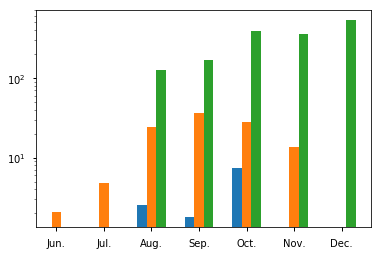

In [655]:
x = np.array(range(8,11))
w = 0.2
plt.bar(x-w, deaths_grouped.loc['Guinea'].values, width=w, align='center')
x = np.array(range(6, 13))
plt.xticks(x, ['Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
plt.bar(x, deaths_grouped.loc['Liberia'].values, width=w, align='center')
x = np.array(range(8, 13))
plt.bar(x+w, deaths_grouped.loc['Sierra Leone'].values , width=w, align='center')
plt.yscale('log')
plt.show()

#### Note: 
The columns 'date' in the three dataframes and 'variable' in the dataframes for Liberia and Sierra Leone coalesced.

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [990]:
path = DATA_FOLDER + '/microbiome/'

# There should be 9 files of data
all_mid_files = glob.glob(os.path.join(path, "MID*"))    
print('Found '+str(len(all_mid_files))+' csv files for data')

# There should be 1 file of metadata
metadata = pd.read_excel(path + 'metadata.xls')

data = pd.concat(
    (pd.read_excel(f, header=None) for f in all_mid_files), 
    ignore_index=False, 
    keys=("MID"+str(i) for i in range(1,10)))

metadata = metadata.set_index('BARCODE')
data.reset_index(level=0, inplace=True)
data.columns = ['BARCODE', 'MICROBIOME', 'COUNTS']
data

Found 9 csv files for data


,BARCODE,MICROBIOME,COUNTS
0,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7
1,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
2,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3
3,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3
4,MID1,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7
5,MID1,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1
6,MID1,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1
7,MID1,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1
8,MID1,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1
9,MID1,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1


In [960]:
metadata.head()

,GROUP,SAMPLE
BARCODE,,
MID1,EXTRACTION CONTROL,NaN
MID2,NEC 1,tissue
MID3,Control 1,tissue
MID4,NEC 2,tissue
MID5,Control 2,tissue


In [991]:
combined_data = data.merge(metadata, how='left', left_on='BARCODE', right_index=True)

combined_data.SAMPLE = combined_data.SAMPLE.replace(np.nan, 'unknown')
combined_data = combined_data.set_index(['BARCODE', 'MICROBIOME'])
combined_data.GROUP = combined_data.GROUP.astype('category')

print(combined_data.index.is_unique)
combined_data.head()

True


COUNTS  \
BARCODE MICROBIOME                                                   
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...       7   
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...       2   
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...       3   
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...       3   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...       7   

                                                                         GROUP  \
BARCODE MICROBIOME                                                               
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  EXTRACTION CONTROL   
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  EXTRACTION CONTROL   
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  EXTRACTION CONTROL   
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...  EXTRACTION CONTROL   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...  EXTRACTION CONTROL   

                                                             SAMPLE  
BARCODE MICROBIOME                                                   
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown  
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown  
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  unknown  
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...  unknown  
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...  unknown

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [657]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [658]:
# Write your answer here